In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Lab 1 - Computational Fluid Dynamics - Umeå University Autumn 2021
## Author: Elias Olofsson, 2021-11-22

In [2]:
# Load video data.
video_data = np.loadtxt('data/video_data.txt')
frame_counter_raw = video_data[:, 0]
surface_video = video_data[:, 1]
frame_counter = frame_counter_raw + 30*(np.array(range(0, len(frame_counter_raw)))//30)
fps = 30
time_video = frame_counter/fps

In [3]:
def get_surface_level(phi_data):
    arc_length = phi_data[:, 0]
    arc_length = np.array(list(reversed(arc_length)))
    phi = phi_data[:, 1:]
    surface_level = []
    for i in range(phi.shape[1]):
        idx = ((phi[:, i]-0.5)**2).argmin()
        surface_level.append(arc_length[idx])
    return np.array(surface_level)

## Sensitivity study

In [4]:
# Sensitivity study: varying the kinematic viscosity
phi_sensitivity = np.loadtxt("data/sensitivity.txt")
nu_sensitivity = np.array([14.5, 16.0, 17.5]) # mm^2/s
surface_sensitivity = get_surface_level(phi_sensitivity)

# Divide parametric sweep up into each individual run:
length = surface_sensitivity.shape[0]//3
surface_nu1 = surface_sensitivity[:length]
surface_nu2 = surface_sensitivity[length:2*length]
surface_nu3 = surface_sensitivity[2*length:]

# Time
time_phi = np.linspace(0, 5, num=51, endpoint=True)

In [5]:
phi_multi = np.loadtxt("data/multiphase.txt")
surface_multi = get_surface_level(phi_multi)

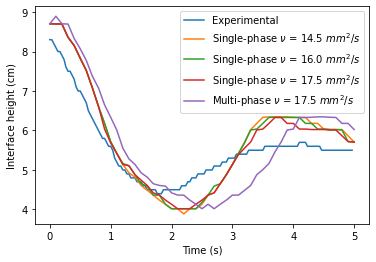

In [6]:
# Plotting sensitivity
plt.plot(time_video, surface_video, label="Experimental") # Experimental results
plt.plot(time_phi, surface_nu1, label=f"Single-phase $\\nu$ = {nu_sensitivity[0]} $mm^2/s$")
plt.plot(time_phi, surface_nu2, label=f"Single-phase $\\nu$ = {nu_sensitivity[1]} $mm^2/s$")
plt.plot(time_phi, surface_nu3, label=f"Single-phase $\\nu$ = {nu_sensitivity[2]} $mm^2/s$")
plt.plot(time_phi, surface_multi, label=f"Multi-phase $\\nu$ = {nu_sensitivity[2]} $mm^2/s$")
plt.xlabel("Time (s)")
plt.ylabel("Interface height (cm)")
plt.legend()
plt.savefig("figures/sensitivity.pdf")

## Convergence study

In [7]:
conv_data = np.loadtxt("data/convergence.txt").T
meshtest = conv_data[0]
t        = conv_data[1]
dof      = conv_data[2]
vel_mag  = conv_data[3]
p        = conv_data[4]
length = t.shape[0]//5

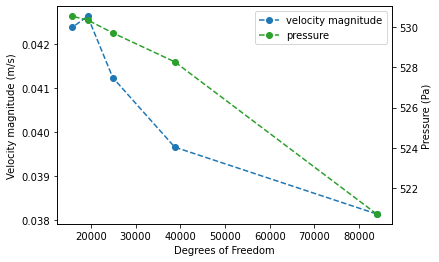

In [8]:
idx_velmag_max = np.argmax(vel_mag[:length])
t_velmag_max = t[idx_velmag_max]
idxs = [i*length+idx_velmag_max for i in range(5)]

fig, ax = plt.subplots()
p1 = ax.plot(dof[idxs], vel_mag[idxs], 'o--', color="tab:blue", label="velocity magnitude")

ax2 = ax.twinx()
p2 = ax2.plot(dof[idxs], p[idxs], 'o--', color="tab:green", label="pressure")

lns = p1+p2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.set_xlabel("Degrees of Freedom")
ax.set_ylabel("Velocity magnitude (m/s)")
ax2.set_ylabel("Pressure (Pa)")
plt.savefig("figures/convergence.pdf")

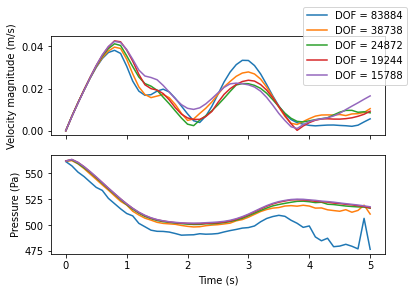

In [9]:
fig, axes = plt.subplots(2, 1, sharex=True)

for i in range(5):
    axes[0].plot(t[i*length:(i+1)*length], vel_mag[i*length:(i+1)*length], label=f"DOF = {int(dof[i*length])}")
axes[0].legend(loc="upper left", bbox_to_anchor=(0.74, 1.35), )

for i in range(5):
    axes[1].plot(t[i*length:(i+1)*length], p[i*length:(i+1)*length], label=f"DOF = {int(dof[i*length])}")
#axes[1].legend()

axes[1].set_xlabel("Time (s)")
axes[0].set_ylabel("Velocity magnitude (m/s)")
axes[1].set_ylabel("Pressure (Pa)")
plt.savefig("figures/convergence_extra.pdf")

## (old stuff)

In [10]:
# Load initial single phi cutline data.
phi_data = np.loadtxt("data/phi_cutline.txt")
time_phi = np.linspace(0, 5, num=51, endpoint=True)
surface_phi = get_surface_level(phi_data)

# Load initial single phi cutline data.
phi_data2 = np.loadtxt("data/phi_cutline2.txt")
time_phi2 = np.linspace(0, 5, num=51, endpoint=True)
surface_phi2 = get_surface_level(phi_data2)